# MNIST Classification

![Number recognition](recognition.gif)

*Note: The animation above is just here to help you visualize what happens with the different images: <br/> $\rightarrow$ For each image, once the CNN is trained, it will predict what digit is written. The inputs are the different digits and not one animation/video!*

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


##  `MNIST` Dataset

In [6]:
# Importantdo o MNIST Dataset...
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

# The train set contains 60 000 images, each of them of size 28x28
# The test set contains 10 000 images, each of them of size 28x28
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### (1.1) Exploring the dataset

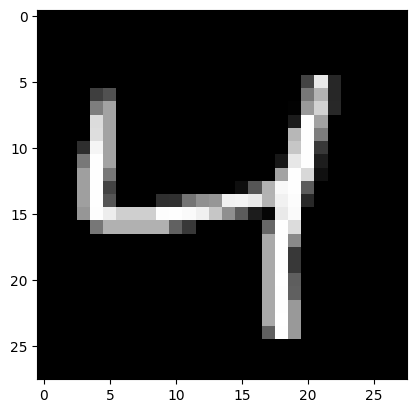

In [7]:
plt.imshow(X_train[2,:,:],cmap='gray')


### (1.2) Image Preprocessing

❗️ **Neural Networks convergem mais rápido quando os dados estão normalizados** ❗️

👩🏻‍🏫 Para as Convolutional Neural Networks ?
* Os canais `RBG` possuem as intensidades decodificadas entre 0 e 255. 
* Para tanto vamos dividir os dois datasets por 255, então teremos os valores dentre 0 e 1😉

In [8]:
X_train = X_train/255
X_test = X_test/255


### (1.3) Inputs' Shapes

In [9]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


**É preciso expandir o formato dos dados a serem inseridos na rede, pois as CNNs exigem que a quantidade de canais de cada pixel seja dita**

No nosso caso, como a imagem está em gray scale então só possui um canal.

In [10]:
from tensorflow.keras.backend import expand_dims
X_train = expand_dims(X_train,axis=-1)
X_test = expand_dims(X_test,axis=-1)


2023-12-02 13:47:25.373702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-02 13:47:25.374008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-02 13:47:25.374089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-12-02 13:47:25.374149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-12-02 13:47:25.374240: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [12]:
print(X_train.shape,X_test.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


### (1.4) Target encoding

In [13]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)


In [14]:
# Quick check that you correctly used to_categorical
assert(y_train_cat.shape == (60000,10))
assert(y_test_cat.shape == (10000,10))


The data is now ready to be used. ✅

## (2) Convolutional Neural Network

### (2.1) Definindo uma Arquitetura e parâmetros de compilação da CNN

In [41]:
from tensorflow.keras import layers
from tensorflow.keras import models


def initialize_model():

    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(16,(4,4),input_shape=(28,28,1),activation='relu',padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Flattening
    model.add(layers.Flatten())
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(30,activation='relu'))
    model.add(layers.Dropout(0.2))
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(10,activation='softmax'))
    ### Model compilation
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model


Anális da quantidade de parâmetros gerados pela rede

In [42]:
model = initialize_model()
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        272       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1568)              0         
                                                                 
 dense_11 (Dense)            (None, 30)               

### (2.2) Treinameneto da CNN

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

model.fit(X_train,y_train_cat,
          validation_split = 0.3,
          epochs=2,batch_size=32,verbose=1)


Epoch 1/2


1875/1875 [==============================] - 12s 6ms/step - loss: 0.2728 - accuracy: 0.9141
Epoch 2/2
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1033 - accuracy: 0.9680




Com `verbose = 1` ao treinar o model temos acesso ao numero de iteraçoes para cada epoch.
    
Número de imagens = 60000
batch_size = 32

* Para cada epoch, temos $ \large \lceil \frac{60000}{32} \rceil = 1875$ minibatches <br/>
* O _validation_split_ é $0.3$ - o que significa que para cada epoch:
    * $ \lceil 1875 \times (1 - 0.3) \rceil = \lceil 1312.5 \rceil = 1313$ batches são usados para computar `train_loss` 
    * $ 1875 - 1312 = 562 $ consequentemente 562 são para calcular `val_loss`
    * **Os parametros são atualiazdos 1313 vezes por epoch** pois são 1313 forward/backward propagations por epoch !!!



</details>    


### (2.3) Avaliando a Performance da Rede Convolucional



Descobrindo a **`accuracy no  test set`**

In [59]:
print(model.evaluate(X_test, y_test_cat, verbose=0))
predicted = model.predict(X_test)


[0.046758733689785004, 0.9861000180244446]
313/313 [==============================] - 1s 4ms/step


**`Ajustando o shape das respostas com o resultado predito pela CNN`**

In [66]:
predicted_labels = np.argmax(predicted, axis=1)
true_labels = np.argmax(y_test_cat,axis=1)
assert(true_labels.shape == predicted_labels.shape)


In [67]:
matriz_confusao = confusion_matrix(true_labels, predicted_labels)
print(matriz_confusao)


[[ 974    0    2    0    0    0    1    1    2    0]
 [   0 1123    3    2    0    0    3    0    4    0]
 [   2    1 1024    2    0    0    0    1    2    0]
 [   0    0    0 1001    0    3    0    3    3    0]
 [   0    0    1    0  974    0    2    0    1    4]
 [   1    0    0    6    0  877    3    2    3    0]
 [   2    3    0    0    2    3  944    0    4    0]
 [   0    3   10    4    0    0    0 1005    2    4]
 [   4    0    2    1    2    0    0    3  959    3]
 [   2    4    1    1    6    4    0    6    5  980]]


In [73]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(true_labels, predicted_labels)}\n"
)


Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f83781276d0>:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


